In [1]:
import pandas as pd
import obspy 
import os
import re
import logging
import obspy.signal.interpolation as itp
import obspy.core.stream 
import obspy.core.trace
from datetime import datetime
import numpy as np

os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir))


In [199]:
os.getcwd()

'C:\\Users\\LENOVO\\OneDrive\\Documentos\\Estancia de Investigación'

In [2]:
os.chdir("C:/Users/LENOVO/OneDrive/Documentos/Estancia de Investigación/PopocatepetlVolcano")
os.getcwd()

'C:\\Users\\LENOVO\\OneDrive\\Documentos\\Estancia de Investigación\\PopocatepetlVolcano'

In [189]:
paths = os.listdir("data/2023/01/01") 

folders =  os.listdir("data/2023/") 

letters = 'CN.PPPP'

with_s = [x for x in paths if re.match(r'^{}'.format(letters), x)]

folders

['01', '02', '03', '04', '05', '06', '07', '08', '09', '11', '12']

In [53]:
len(with_s)

24

In [28]:
os.chdir(os.getcwd())

In [54]:
def data_day_processing(Year,Month,Day):
    paths = os.listdir("data/"+Year+"/"+Month+"/"+Day)
    paths_PPPP = [x for x in paths if re.match(r'^{}'.format('CN.PPPP'), x)]
    bandera = True
    if len(paths_PPPP)>0:
        if len(paths_PPPP)==24:
            k = 1
            for i in paths_PPPP:
                st = obspy.read("data/"+Year+"/"+Month+"/"+Day+"/"+i)
                st = st.select(component='Z')
                if len(st)==1:
                    if st[0].stats.npts==720000:
                        if k == 1:
                            st_final = st[0].resample(sampling_rate = 100)
                        else:
                            st_final = st_final + st[0].resample(sampling_rate = 100)
                        k = k+1
                    else:
                        bandera = False
                        logging.error("El archivo "+i+" esta incompleto")
                else:
                    bandera = False
                    logging.error("No hay componente Z en el archivo "+i)

            
            if bandera:
                st_final.write("data/clean_data/"+Year+"/CN_PPPP_HHZ_"+Year+"_"+Month+"_"+Day+".seed", format = 'mseed')   
        else:
            #logging.error("El dia no esta completo en el dia "+Year+"_"+Month+"_"+Day)
            k = 1
            for i in paths_PPPP:
                st = obspy.read("data/"+Year+"/"+Month+"/"+Day+"/"+i)
                st = st.select(component='Z')
                if len(st)==1:
                    if st[0].stats.npts==720000:
                        if k == 1:
                            st_final = st[0].resample(sampling_rate = 100)
                        else:
                            #st_final = st_final + st[0].resample(sampling_rate = 100)
                            st_final2 = st[0].resample(sampling_rate = 100)
                            st_final = obspy.Trace.__add__(self=st_final, trace= st_final2, fill_value='0')
                        k = k+1
                    else:
                        bandera = False
                        logging.error("El archivo "+i+" esta incompleto")
                else:
                    bandera = False
                    logging.error("No hay componente Z en el archivo "+i)

            
            if bandera:
                st_final.write("data/clean_data/"+Year+"/CN_PPPP_HHZ_"+Year+"_"+Month+"_"+Day+".seed", format = 'mseed')   
    else:
        logging.error("El dia "+Year+"_"+Month+"_"+Day+ "no tiene archivos para la estación PPPP")

            

In [52]:
os.getcwd()

'C:\\Users\\LENOVO\\OneDrive\\Documentos\\Estancia de Investigación\\PopocatepetlVolcano'

In [58]:
data_day_processing('2022','04','09')

c:\Users\LENOVO\OneDrive\Documentos\Estancia de Investigación\Estancia_Maestría\Lib\site-packages\obspy\io\mseed\core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


In [7]:
st = obspy.read("./data/2022/02/22/CN.PPPP._20220222_180000.seed")


In [4]:
st

9 Trace(s) in Stream:
CN.PPPP..HHE | 2022-02-22T18:00:00.000000Z - 2022-02-22T18:46:10.200000Z | 200.0 Hz, 554041 samples
CN.PPPP..HHE | 2022-02-22T18:48:54.365000Z - 2022-02-22T18:49:34.715000Z | 200.0 Hz, 8071 samples
CN.PPPP..HHE | 2022-02-22T18:49:35.400000Z - 2022-02-22T18:59:59.995000Z | 200.0 Hz, 124920 samples
CN.PPPP..HHN | 2022-02-22T18:00:00.000000Z - 2022-02-22T18:46:11.405000Z | 200.0 Hz, 554282 samples
CN.PPPP..HHN | 2022-02-22T18:48:54.365000Z - 2022-02-22T18:49:34.715000Z | 200.0 Hz, 8071 samples
CN.PPPP..HHN | 2022-02-22T18:49:35.400000Z - 2022-02-22T18:59:59.995000Z | 200.0 Hz, 124920 samples
CN.PPPP..HHZ | 2022-02-22T18:00:00.000000Z - 2022-02-22T18:46:10.115000Z | 200.0 Hz, 554024 samples
CN.PPPP..HHZ | 2022-02-22T18:48:54.365000Z - 2022-02-22T18:49:34.715000Z | 200.0 Hz, 8071 samples
CN.PPPP..HHZ | 2022-02-22T18:49:35.400000Z - 2022-02-22T18:59:59.995000Z | 200.0 Hz, 124920 samples

In [5]:
st_final = st.select(component='Z')
st_final = st_final.resample(sampling_rate=100)

In [8]:
st_final[0]

CN.PPPP..HHZ | 2022-02-22T18:00:00.000000Z - 2022-02-22T18:46:10.110000Z | 100.0 Hz, 277012 samples

In [9]:
st_final_complete = st_final.interpolate(sampling_rate = 100)

In [10]:
st_final

3 Trace(s) in Stream:
CN.PPPP..HHZ | 2022-02-22T18:00:00.000000Z - 2022-02-22T18:46:10.110000Z | 100.0 Hz, 277012 samples
CN.PPPP..HHZ | 2022-02-22T18:48:54.365000Z - 2022-02-22T18:49:34.695000Z | 100.0 Hz, 4034 samples
CN.PPPP..HHZ | 2022-02-22T18:49:35.400000Z - 2022-02-22T18:59:59.980000Z | 100.0 Hz, 62459 samples

In [11]:
len(st_final)



3

In [12]:
st_final_complete =st_final[0]+st_final[1]+ st_final[2]

In [13]:
aux1 =obspy.Trace.__add__(self=st_final[0], trace=st_final[1] , fill_value='interpolate')

In [14]:
st_final_complete = obspy.Trace.__add__(aux1, trace=st_final[2] , fill_value='interpolate')

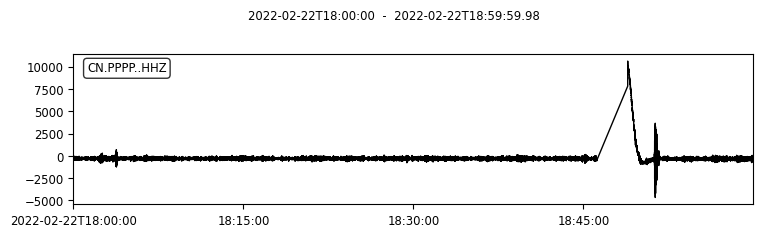

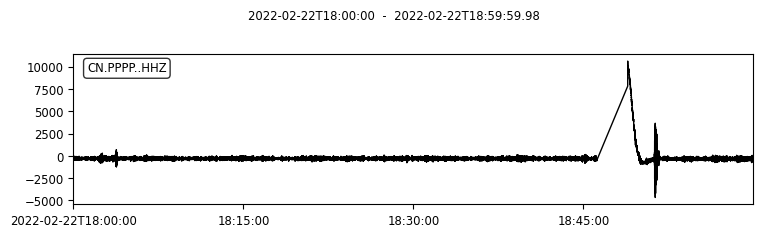

In [15]:
st_final_complete.plot()

In [16]:
st_final_complete

CN.PPPP..HHZ | 2022-02-22T18:00:00.000000Z - 2022-02-22T18:59:59.980000Z | 100.0 Hz, 359999 samples

In [197]:
st_final_complete.interpolate(sampling_rate=100)

NotImplementedError: Trace with masked values found. This is not supported for this operation. Try the split() method on Trace/Stream to produce a Stream with unmasked Traces.

In [243]:
st_final_complete[277020]

masked

3 Trace(s) in Stream:
CN.PPPP..HHZ | 2022-02-22T18:00:00.000000Z - 2022-02-22T18:46:10.110000Z | 100.0 Hz, 277012 samples
CN.PPPP..HHZ | 2022-02-22T18:48:54.365000Z - 2022-02-22T18:49:34.695000Z | 100.0 Hz, 4034 samples
CN.PPPP..HHZ | 2022-02-22T18:49:35.400000Z - 2022-02-22T18:59:59.970000Z | 100.0 Hz, 62458 samples

In [120]:
277012+4034+62458

343504

In [41]:
st = obspy.read("data/2022/03/16/CN.PPPP._20220316_000000.seed")
st1 = obspy.read("data/2022/03/16/CN.PPPP._20220316_010000.seed")
st2 = obspy.read("data/2022/03/16/CN.PPPP._20220316_020000.seed")
st3 = obspy.read("data/2022/03/16/CN.PPPP._20220316_030000.seed")
st4 = obspy.read("data/2022/03/16/CN.PPPP._20220316_040000.seed")

In [8]:
st_final = st.select(component='Z')[0].resample(sampling_rate = 100) + st1.select(component='Z')[0].resample(sampling_rate = 100) + st2.select(component='Z')[0].resample(sampling_rate = 100) +st3.select(component='Z')[0].resample(sampling_rate = 100) +st4.select(component='Z')[0].resample(sampling_rate = 100)



In [10]:
st = obspy.read("data/2022/03/16/CN.PPPP._20220222_000000.seed")

CN.PPPP..HHZ | 2022-03-16T00:00:00.000000Z - 2022-03-16T04:59:59.990000Z | 100.0 Hz, 1800000 samples (masked)

In [82]:
st1[2].stats.npts

360000

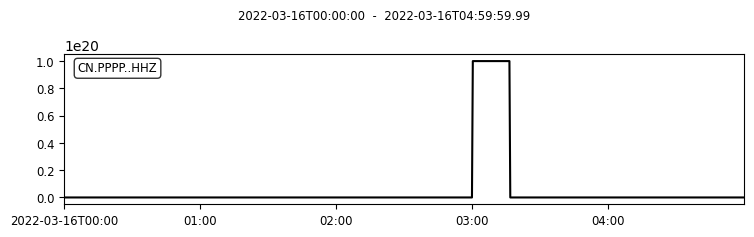

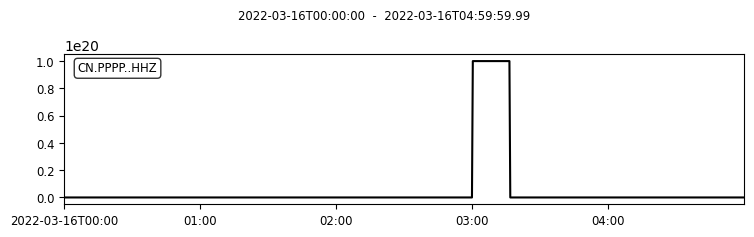

In [67]:
st_final.plot()

In [176]:
st = obspy.read("data/2023/01/01/CN.PPPP._20230101_000000.seed")
st2 = obspy.read("data/2023/01/01/CN.PPPP._20230101_020000.seed")

#st_vacio = obspy.Stream.clear

#st_vacio

#st[2]+st_vacio

st2 = st.select(component='Z')

st2[0].resample(sampling_rate = 100).data.dtype


#st2.plot()
#st2.stats

#st2 = st[2]
#st2.stats 
#st[2].data.dtype

dtype('float64')

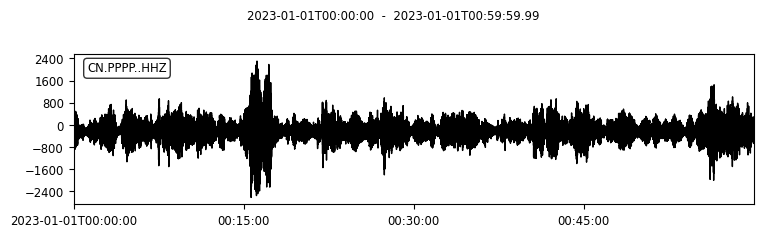

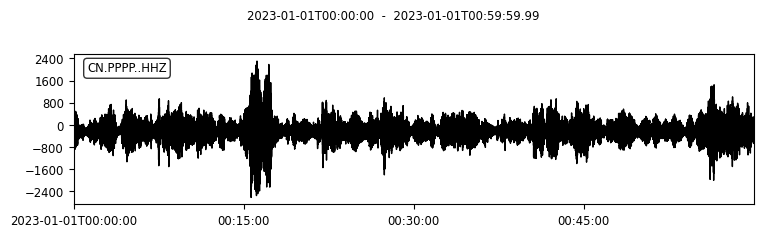

In [177]:
st[2].stats

st[2].data.dtype

st[2].plot()


In [50]:
st_hz = (st[2]+st2[2]).resample(sampling_rate=100)
st_hz.stats

#st3_hz = st_hz+st2_hz

         network: CN
         station: PPPP
        location: 
         channel: HHZ
       starttime: 2023-01-01T00:00:00.000000Z
         endtime: 2023-01-01T02:59:59.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 1080000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1764, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 512, 'filesize': 2737152})
      processing: ["ObsPy 1.4.1: resample(no_filter=True::sampling_rate=100::strict_length=False::window='hann')"]

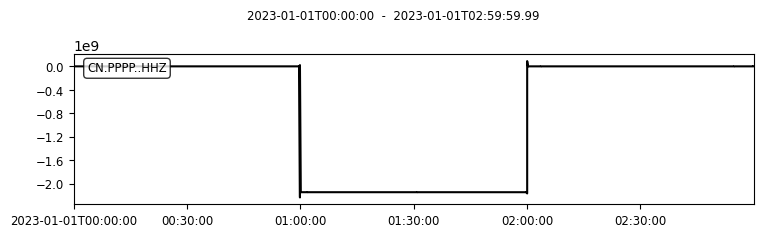

c:\Users\LENOVO\OneDrive\Documentos\Estancia de Investigación\Estancia_Maestría\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  fig.canvas.print_figure(bytes_io, **kw)


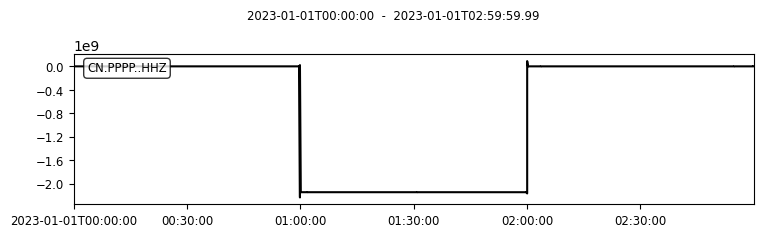

In [51]:
st_hz.plot()

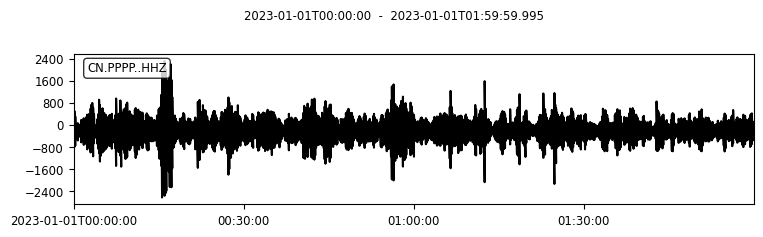

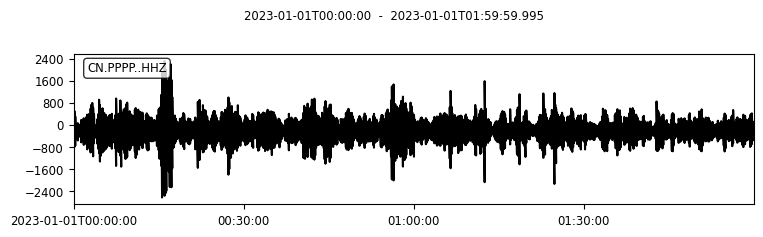

In [22]:
st3_hz.plot()

In [14]:
st_hz_smple = st_hz.copy()

In [23]:
st_hz_smple.resample(sampling_rate=100)

CN.PPPP..HHZ | 2023-01-01T00:00:00.000000Z - 2023-01-01T00:59:59.990000Z | 100.0 Hz, 360000 samples

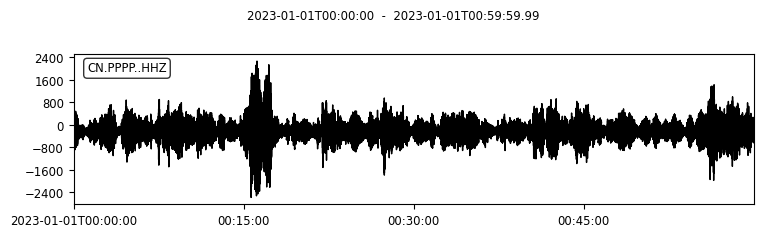

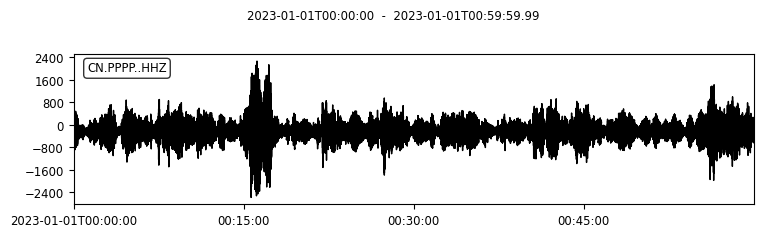

In [24]:
st_hz_smple.plot()

In [9]:
st = obspy.read("data/clean_data/2022/CN_PPPP_HHZ_2022_04_09.seed")
#st2 = obspy.read("data/clean_data/2022/CN_PPPP_HHZ_20220102.sac")

In [10]:
#st2[0].stats

IndexError: index 0 is out of bounds for axis 0 with size 0

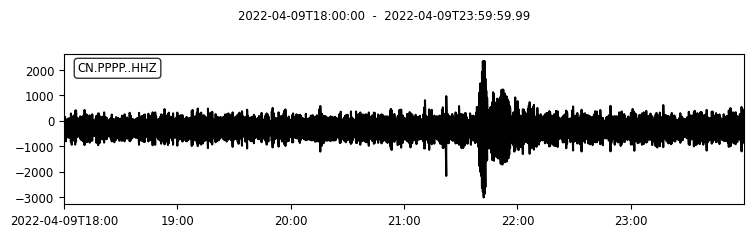

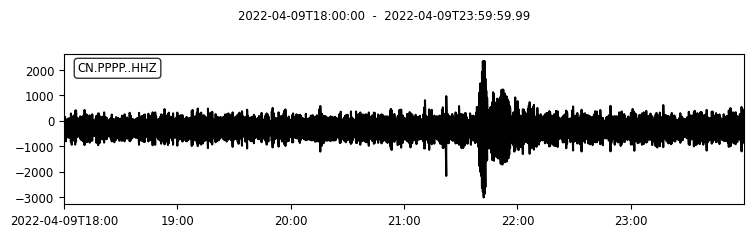

In [6]:
st.plot()

In [5]:
array= np.arange(0)

array = array.astype(float)

st2 = obspy.core.trace.Trace(data = array)

In [6]:
st2.stats.starttime="2022-04-09T00:00:00Z"
st2.id = "CN.PPPP..HHZ"
st2.stats.delta = 0.01
st2.sampling_rate = 100



In [7]:
st2.stats

         network: CN
         station: PPPP
        location: 
         channel: HHZ
       starttime: 2022-04-09T00:00:00.000000Z
         endtime: 2022-04-09T00:00:00.000000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 0
           calib: 1.0

In [8]:
st_final = obspy.Trace.__add__(self=st2, trace=st[0] , fill_value=0.0)

NameError: name 'st' is not defined

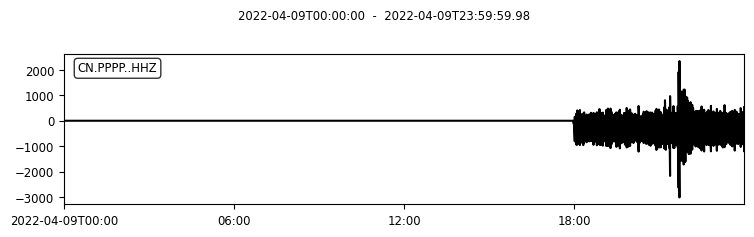

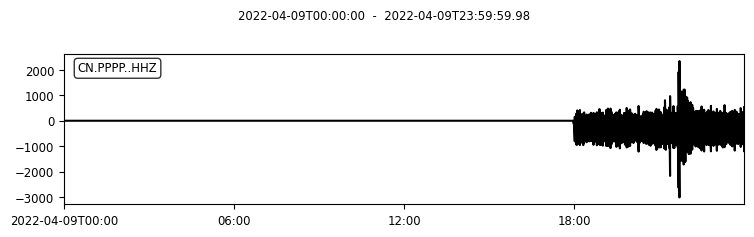

In [76]:
st_final.plot()

In [11]:
array= np.arange(0)

array = array.astype(float)

st1 = obspy.core.trace.Trace(data = array)

st1.stats.starttime="2022-04-09T00:00:00Z"
st1.id = "CN.PPPP..HHZ"
st1.stats.delta = 0.01
st1.sampling_rate = 100


st2 = obspy.core.trace.Trace(data = array)

st2.stats.starttime="2022-04-09T23:00:00Z"
st2.id = "CN.PPPP..HHZ"
st2.stats.delta = 0.01
st2.sampling_rate = 100




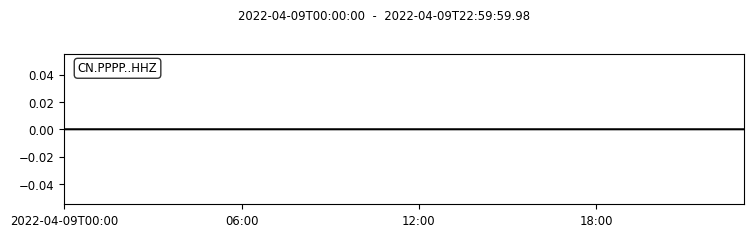

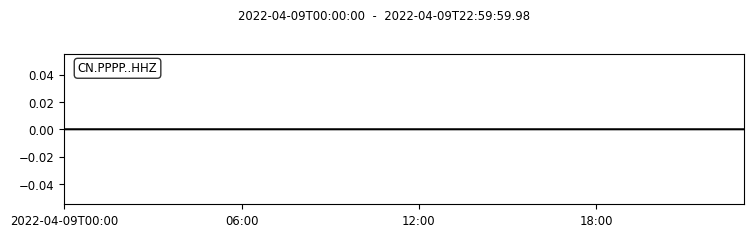

In [12]:
st_final = obspy.Trace.__add__(self=st1, trace=st2 , fill_value=0.0)
st_final.plot()